In [1]:
#Search for specific terms within a corpus of texts
#texts used are txt files of pubmed "Disorders of Consciousness" studies
#2239 documents considered relevant after TM (references already removed)
#Outputs: bar graph of all dictionary terms + BoW of corpus
#Outputs: term document matrix as a csv in downloads

In [2]:
import functions

In [3]:
dict_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/CombinedDict.txt"
corpus_dir = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/TM_ANTI_pdfs"
replacement_path = "/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/Inputs/CombinedDict.csv"

In [4]:
#define the lists we'll need for outputs

dictionary = []

combined = [] #For pathway 2 - total dictionary list

docs = []

In [5]:
doc_list = functions.os_level.get_corpus(corpus_dir, "txt")

In [6]:
print("We have a total of {} articles".format(len(doc_list)))

We have a total of 1872 articles


In [7]:
dictionary = functions.os_level.makedict(dict_path)

In [8]:
def action(i, doc_list, dictionary):
    
    text = maketxt("{}".format(corpus_dir) + "/{}".format(doc_list[i]), replacement_path)
        
    #remove non-dictionary words
    text = rem_dict(dictionary,text) 
        
    #add to Total List for Combined BoW later
    combined.extend(text) 
        
    #check corpus doc again
        
    #add to list of text strings for tdm
    doc_for_tdm = " ".join(text)
    docs.append(doc_for_tdm)
    
    
    
#Create list of words appearing in txt file 
def maketxt(text, csv_path):
    string = ''
    with open(text) as file:
        string = file.read()
        return functions.processing.preprocess(string, csv_path)
    
#Remove words not in the dictionary NOTE: Will find words within words ie. bar within bars
def rem_dict(dictionary, doc):
    new_doc = []
    for i in range(len(doc)):
        for j in range(len(dictionary)):
            if dictionary[j] in doc[i]:
                new_doc.append(dictionary[j])
    return new_doc

In [9]:
for i in range(len(doc_list)):
            action(i, doc_list, dictionary)

In [10]:
save_location = "/Users/manojarachige/Downloads/"

import pandas as pd

def display(combined, csv_path):
    df = pd.read_csv(csv_path)
    for i in range(len(df)): #python replace items in a loop
        for j in range(len(combined)):
            if df["Replacement"][i] == combined[j]:
                combined[j] = df["Display"][i]
    return combined

In [11]:
#output 1
df = functions.outputs.tdm_make(docs)
df.to_csv(r'{}TDM.csv'.format(save_location))

Total>>> [('thalamus', 1112), ('hippocampus', 794), ('cerebellum', 620), ('amygdala', 504), ('cingulate cortex', 374), ('cuneus', 206), ('anterior cingulate cortex', 203), ('caudate nucleus', 194), ('insular cortex', 193), ('precuneus', 185), ('cerebellar crus', 180), ('premotor cortex', 147), ('auditory cortex', 143), ('ventral tegmental area', 116), ('superior temporal gyrus', 109), ('orbitofrontal area', 87), ('posterior cingulate gyrus', 83), ('orbital inferior frontal gyrus', 72), ('substantia nigra', 68), ('precentral gyrus', 66), ('fusiform gyrus', 65), ('dorsolateral prefrontal cortex', 64), ('lenticular nucleus', 61), ('vermis', 60), ('inferior parietal gyrus', 59), ('ventral entorhinal cortex', 53), ('postcentral gyrus', 52), ('supplementary motor cortex', 51), ('primary visual cortex', 51), ('middle temporal gyrus', 49), ('intralaminar thalamus', 45), ('supramarginal gyrus', 44), ('rolandic operculum', 37), ('locus coeruleus', 36), ('angular gyrus', 36), ('primary motor cort

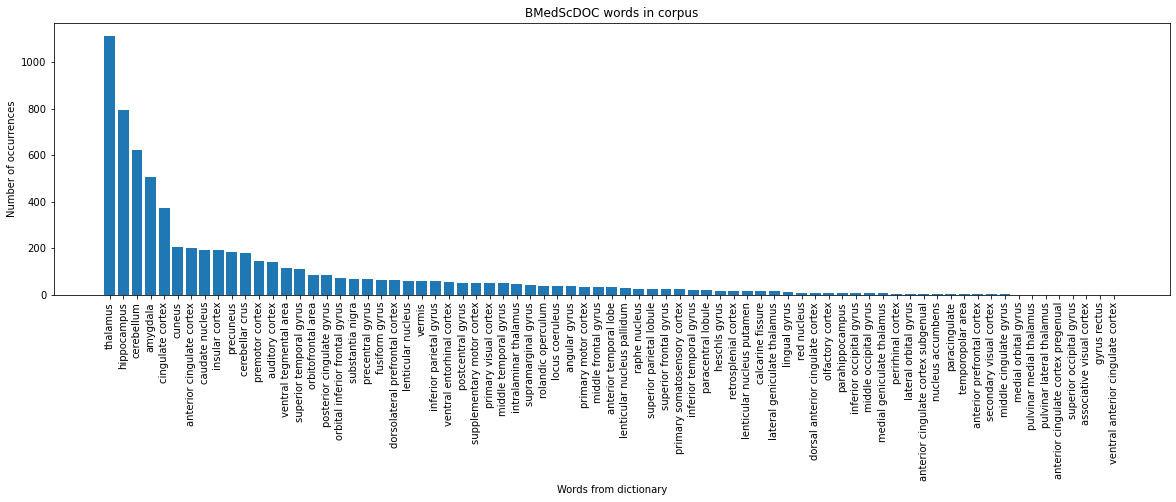

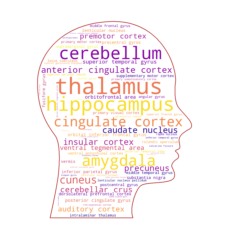

In [12]:
for_display = display(combined, replacement_path)

#output 2
functions.outputs.barchart(for_display, save_location)

#output 3
functions.outputs.wc(for_display)